In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('ice.csv')

In [4]:
df['DATE']=pd.to_datetime(df['DATE'])

In [5]:
df.head(2)

,DATE,Icecream
0,1972-01-01,59.9622
1,1972-02-01,67.0605


In [6]:
df1=df.reset_index()['Icecream']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(403, 174)

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3----49 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(352, 50)
(352,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
18/18 [==============================] - 10s 155ms/step - loss: 0.0698 - val_loss: 0.0255
Epoch 2/100
18/18 [==============================] - 1s 54ms/step - loss: 0.0287 - val_loss: 0.0208
Epoch 3/100
18/18 [==============================] - 1s 56ms/step - loss: 0.0267 - val_loss: 0.0197
Epoch 4/100
18/18 [==============================] - 1s 55ms/step - loss: 0.0264 - val_loss: 0.0162
Epoch 5/100
18/18 [==============================] - 1s 54ms/step - loss: 0.0266 - val_loss: 0.0173
Epoch 6/100
18/18 [==============================] - 1s 55ms/step - loss: 0.0256 - val_loss: 0.0204
Epoch 7/100
18/18 [==============================] - 1s 57ms/step - loss: 0.0257 - val_loss: 0.0285
Epoch 8/100
18/18 [==============================] - 1s 57ms/step - loss: 0.0261 - val_loss: 0.0230
Epoch 9/100
18/18 [==============================] - 1s 58ms/step - loss: 0.0260 - val_loss: 0.0169
Epoch 10/100
18/18 [==============================] - 1s 60ms/step - loss: 0.0257 - val_loss: 0.01

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

4/4 [==============================] - 1s 18ms/step


Checking accuracy of the testing data

In [42]:
test_predict.shape

(123, 1)

In [44]:
ytest=ytest.reshape(-1,1)
y_test=scaler.inverse_transform(ytest)

In [45]:
y_test.shape

(123, 1)

In [46]:
math.sqrt(mean_squared_error(y_test,test_predict))


9.93118034952113

In [47]:
print('Mean absolute error percentage :'+str(round(np.mean(abs((test_predict-y_test)/y_test)*100),2))+'%')

Mean absolute error percentage :7.27%


In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

115.69252589084343

In [27]:
math.sqrt(mean_squared_error(ytest,test_predict))


109.9043520717984

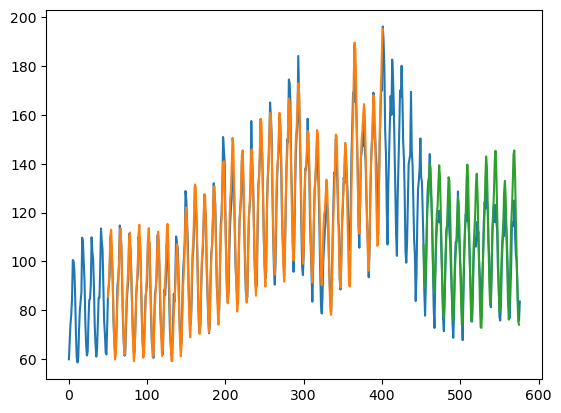

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
import pickle
pickle.dump(model, open('LSTM_model.pkl', 'wb'))

In [56]:
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))

In [57]:
scaler1=pickle.load(open('scaler_model.pkl','rb'))

In [58]:
df2=df[527:]['Icecream']

In [96]:
x_input=scaler1.transform(np.array(df2).reshape(-1,1))

In [97]:
x_input=x_input.reshape(1,-1)
x_input.shape

(1, 50)

In [98]:
temp_input=list(x_input)


In [99]:
temp_input=temp_input[0].tolist()

In [100]:
lst_output=[]
n_steps=50
i=0
while(i<5):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [111]:
lst_output

[[0.2500614523887634],
 [0.33224788308143616],
 [0.4141649603843689],
 [0.4753180146217346],
 [0.49744826555252075]]

In [103]:
k=scaler.inverse_transform(lst_output)

In [118]:
k

[93.04672555764317,
 104.3485021692723,
 115.61323894580006,
 124.02263393089174,
 127.06585104436277]

In [113]:
k=k.reshape(1,-1)
k.shape

(1, 5)

In [114]:
k=list(k)
k=k[0].tolist()

In [115]:
d={'date':['A','B','C','D','E'],'Predictions':k}

In [116]:
dataframe=pd.DataFrame(d)

In [117]:
dataframe

,date,Predictions
0,A,93.046726
1,B,104.348502
2,C,115.613239
3,D,124.022634
4,E,127.065851
